In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torch.optim import AdamW
from models import get_model
from utils import get_loader, train, test, evaluation
from tqdm.auto import tqdm

# Homograph

In [2]:
loader_name = "Neighbor"
hidden_size = 128
model_name = 'GraphSAGE'
learning_rate = 0.002
epoch_num = 200
data_path = 'data/processed/data_homo.pt'
model_save_path = 'models/'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
data = torch.load(data_path)
edge_type = data.edge_attr[:, 1:].argmax(dim=1)
train_loader, val_loader, test_loader = get_loader(data, loader_name)

/data/GNN Project/GNN-land-use/pytorch_geometric/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [4]:
num_features = data.x.shape[1]
num_classes = data.y.shape[1]
model = get_model(model_name, num_features, hidden_size, num_classes, device)
optimizer = AdamW(model.parameters(), lr=learning_rate)

In [5]:
loss_history = []
val_acc_history = []
test_acc_history = []
for epoch in tqdm(range(1, epoch_num + 1)):
    loss = train(model_name, model, train_loader, optimizer, device)
    val_acc = test(model_name, model, val_loader, device)
    test_acc = test(model_name, model, test_loader, device)
    loss_history.append(loss)
    val_acc_history.append(val_acc)
    test_acc_history.append(test_acc)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, ',
          f'Val: {val_acc:.4f} Test: {test_acc:.4f}')

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 01, Loss: 0.0521,  Val: 0.0310 Test: 0.0316
Epoch: 02, Loss: 0.0315,  Val: 0.0272 Test: 0.0273
Epoch: 03, Loss: 0.0279,  Val: 0.0246 Test: 0.0249
Epoch: 04, Loss: 0.0264,  Val: 0.0235 Test: 0.0237
Epoch: 05, Loss: 0.0250,  Val: 0.0228 Test: 0.0227
Epoch: 06, Loss: 0.0241,  Val: 0.0220 Test: 0.0219
Epoch: 07, Loss: 0.0231,  Val: 0.0215 Test: 0.0210
Epoch: 08, Loss: 0.0222,  Val: 0.0208 Test: 0.0208
Epoch: 09, Loss: 0.0211,  Val: 0.0196 Test: 0.0195
Epoch: 10, Loss: 0.0201,  Val: 0.0188 Test: 0.0188
Epoch: 11, Loss: 0.0190,  Val: 0.0178 Test: 0.0176
Epoch: 12, Loss: 0.0181,  Val: 0.0171 Test: 0.0169
Epoch: 13, Loss: 0.0177,  Val: 0.0168 Test: 0.0167
Epoch: 14, Loss: 0.0169,  Val: 0.0160 Test: 0.0160
Epoch: 15, Loss: 0.0164,  Val: 0.0160 Test: 0.0157
Epoch: 16, Loss: 0.0159,  Val: 0.0155 Test: 0.0154
Epoch: 17, Loss: 0.0154,  Val: 0.0147 Test: 0.0148
Epoch: 18, Loss: 0.0150,  Val: 0.0146 Test: 0.0150
Epoch: 19, Loss: 0.0147,  Val: 0.0141 Test: 0.0142
Epoch: 20, Loss: 0.0143,  Val: 

In [6]:
results = evaluation(model_name, model, test_loader, device)
torch.save(model, f'{model_save_path}{model_name}_{loader_name}.pth')
print(results)

              MSE   RMSE    MAE     R2
office      0.003  0.056  0.040  0.894
sustenance  0.002  0.043  0.031  0.941
transport   0.003  0.058  0.042  0.916
retail      0.005  0.070  0.053  0.840
leisure     0.007  0.083  0.061  0.769
residence   0.006  0.077  0.057  0.838


torch.Size([42223])
torch.Size([4236, 67])


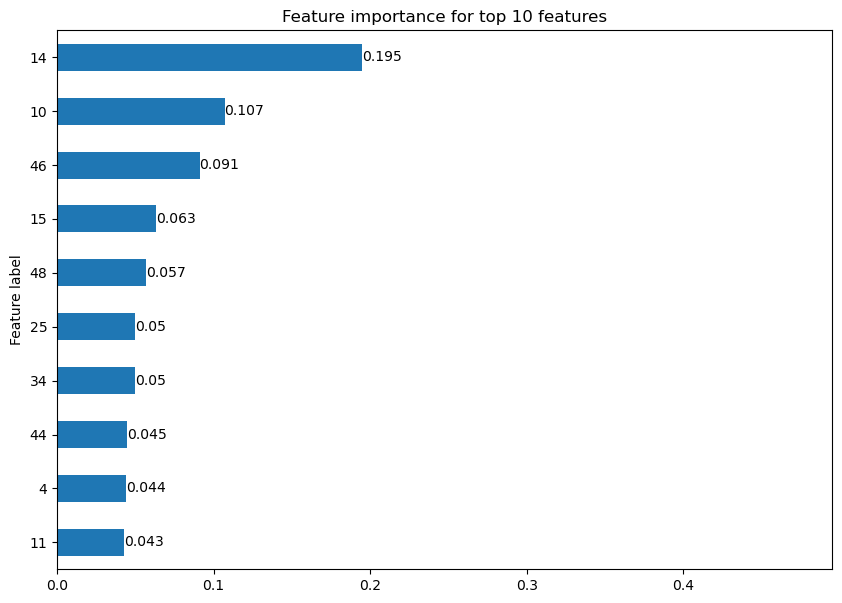

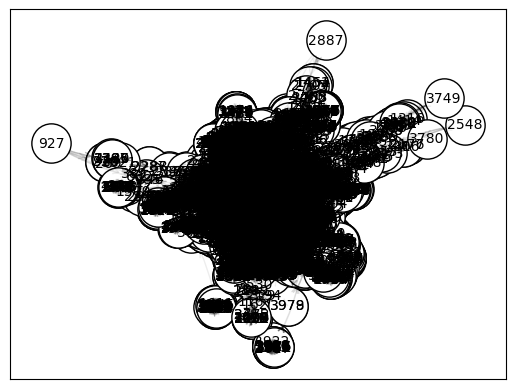

In [7]:
from torch_geometric.explain import Explainer, CaptumExplainer, GNNExplainer

explainer = Explainer(
    model=model,
    algorithm=CaptumExplainer('IntegratedGradients'),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='regression',
        task_level='node',
        return_type='raw',
    ),
)

# Using same method to get edge type as in utils.py
explanation = explainer(test_loader.data.x, test_loader.data.edge_index, index=1, captum_target=0)
print(explanation.edge_mask.shape)
print(explanation.node_mask.shape)
explanation.visualize_feature_importance(top_k=10)
explanation.visualize_graph()

torch.Size([42223])
torch.Size([4236, 67])


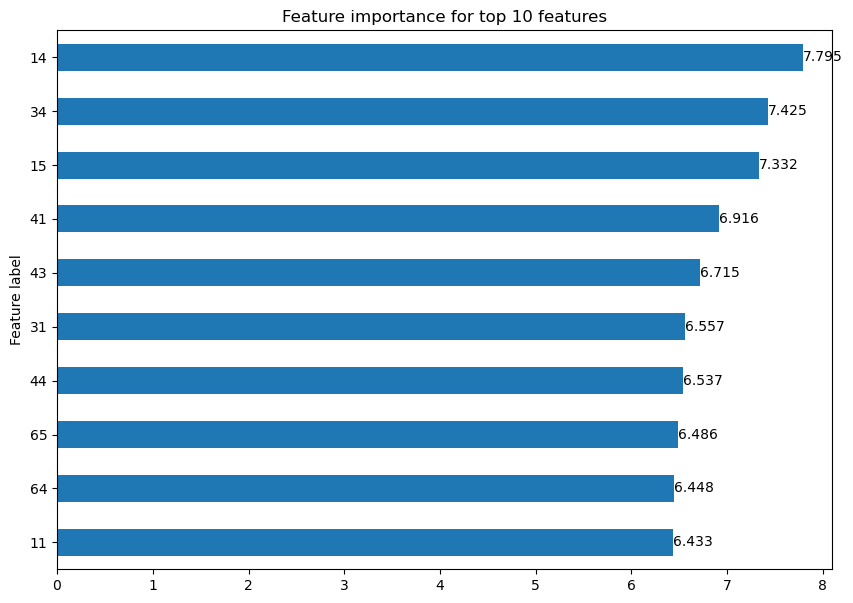

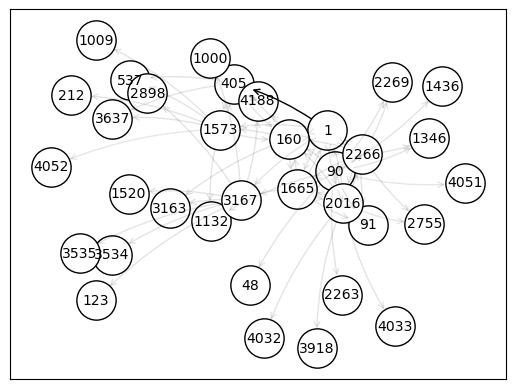

In [8]:
from torch_geometric.explain import Explainer, CaptumExplainer, GNNExplainer

explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=200),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='regression',
        task_level='node',
        return_type='raw',
    ),
)

explanation = explainer(test_loader.data.x, test_loader.data.edge_index, index=1, captum_target=0)
print(explanation.edge_mask.shape)
print(explanation.node_mask.shape)
explanation.visualize_feature_importance(top_k=10)
explanation.visualize_graph()

# Heterograph

In [3]:
loader_name = "Neighbor"
hidden_size = 128
model_name = 'RGCN'
learning_rate = 0.002
epoch_num = 200
data_path = 'data/processed/data_homo.pt'
model_save_path = 'models/'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
data = torch.load(data_path)
edge_type = data.edge_attr[:, 1:].argmax(dim=1)
train_loader, val_loader, test_loader = get_loader(data, loader_name)

/data/GNN Project/GNN-land-use/pytorch_geometric/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [5]:
num_features = data.x.shape[1]
num_classes = data.y.shape[1]
model = get_model(model_name, num_features, hidden_size, num_classes, device)
optimizer = AdamW(model.parameters(), lr=learning_rate)

In [6]:
loss_history = []
val_acc_history = []
test_acc_history = []
for epoch in tqdm(range(1, epoch_num + 1)):
    loss = train(model_name, model, train_loader, optimizer, device)
    val_acc = test(model_name, model, val_loader, device)
    test_acc = test(model_name, model, test_loader, device)
    loss_history.append(loss)
    val_acc_history.append(val_acc)
    test_acc_history.append(test_acc)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, ',
          f'Val: {val_acc:.4f} Test: {test_acc:.4f}')

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 01, Loss: 0.1377,  Val: 0.0433 Test: 0.0447
Epoch: 02, Loss: 0.0392,  Val: 0.0324 Test: 0.0329
Epoch: 03, Loss: 0.0317,  Val: 0.0279 Test: 0.0284
Epoch: 04, Loss: 0.0279,  Val: 0.0251 Test: 0.0255
Epoch: 05, Loss: 0.0252,  Val: 0.0233 Test: 0.0233
Epoch: 06, Loss: 0.0235,  Val: 0.0219 Test: 0.0222
Epoch: 07, Loss: 0.0217,  Val: 0.0207 Test: 0.0209
Epoch: 08, Loss: 0.0207,  Val: 0.0199 Test: 0.0202
Epoch: 09, Loss: 0.0195,  Val: 0.0191 Test: 0.0194
Epoch: 10, Loss: 0.0188,  Val: 0.0182 Test: 0.0182
Epoch: 11, Loss: 0.0180,  Val: 0.0178 Test: 0.0179
Epoch: 12, Loss: 0.0175,  Val: 0.0171 Test: 0.0172
Epoch: 13, Loss: 0.0167,  Val: 0.0167 Test: 0.0165
Epoch: 14, Loss: 0.0163,  Val: 0.0164 Test: 0.0161
Epoch: 15, Loss: 0.0155,  Val: 0.0157 Test: 0.0158
Epoch: 16, Loss: 0.0151,  Val: 0.0150 Test: 0.0151
Epoch: 17, Loss: 0.0146,  Val: 0.0148 Test: 0.0147
Epoch: 18, Loss: 0.0143,  Val: 0.0146 Test: 0.0142
Epoch: 19, Loss: 0.0137,  Val: 0.0140 Test: 0.0138
Epoch: 20, Loss: 0.0134,  Val: 

In [7]:
results = evaluation(model_name, model, test_loader, device)
torch.save(model, f'{model_save_path}{model_name}_{loader_name}.pth')
print(results)

              MSE   RMSE    MAE     R2
office      0.003  0.052  0.036  0.908
sustenance  0.002  0.045  0.031  0.936
transport   0.003  0.055  0.039  0.924
retail      0.004  0.064  0.046  0.865
leisure     0.005  0.070  0.052  0.838
residence   0.005  0.071  0.052  0.863


In [8]:
from torch_geometric.explain import Explainer, CaptumExplainer, GNNExplainer

explainer = Explainer(
    model=model,
    algorithm=CaptumExplainer('IntegratedGradients'),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='regression',
        task_level='node',
        return_type='raw',
    ),
)

# Using same method to get edge type as in utils.py
index = 0
edge_type = test_loader.data.edge_attr[:, 1:].argmax(dim=1)
explanation = explainer(test_loader.data.x, test_loader.data.edge_index, edge_type=edge_type, index=index, captum_target=0)
print(explanation.edge_mask.shape)
print(explanation.node_mask.shape)
explanation.visualize_feature_importance(top_k=10)
explanation.visualize_graph()

AssertionError: 